 ##           Report - Analysis and Visualizations of wrangled Twitter Archive data - WeRateDogs


## Table of Contents
- [Introduction](#introduction)

- [Analysis & Visualization](#analysevisualize)

- [Conclusion](#conclusion)



<a id='introduction'></a>
## Introduction

The report captures the insights derived from the analysis  and visualizations of the wrangled tweet archive of Twitter user @dog_rates, also known as WeRateDogs.
 

WeRateDogs is a popular twitter account which rates dog pictures with humourous content. Besides their international stardom attributed to their account closure by Twitter, account regaled twitter users with hilarious captions of the dogs sent by users, unique rating in excess of the standard scale of 1 to 10 and spawning new dog lingo.

The data used to derive insights has been downloaded from the Twitter Archive.The data has been enhanced ie the 'tweet text' has been used to extract fields/variables after querying Twitter API.The data also includes image predictions derived from running through the dog images from Twitter archive through neural network to predict dog breeds.

The observations drawn from the analysis and visualizations  presented below are based on the wrangled Twitter archive data.The wrangling details  have been captured in a separate report.

<a id='analysevisualize'></a>
## Analysis  & Visualization

The final, clean data after wrangling has been  stored in a csv file format and this file is used for analysis and visualization.

In [10]:
#Import the required libraries to load the dataset
import pandas as pd

#disable warnings
import warnings
warnings.filterwarnings('ignore')

#Import libraries for plotting
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from matplotlib import style


In [2]:
#Read the stored file into a dataframe
dog_pred=pd.read_csv('twitter_archive_master.csv')

In [11]:
dog_pred['date']=pd.to_datetime(dog_pred['date'])
fav_breeds=dog_pred[dog_pred['dog']==True]

### Popular dog breeds

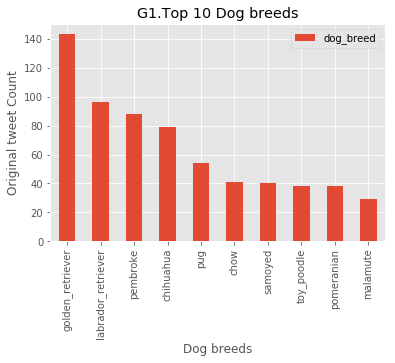

In [4]:
style.use('ggplot')
#plt.figure(figsize=(10,6))
top_dog=fav_breeds.dog_breed.value_counts().sort_values(ascending=False).head(10)
top_dog.plot(kind='bar');
plt.xlabel('Dog breeds')
plt.ylabel('Original tweet Count')
plt.title('G1.Top 10 Dog breeds')
plt.legend();

The most popular dog breed undoubtedly is the 'Golden Retriever'. Most of the tweets by the WeRateDogs have been for the Golden Retriever pictures sent in by the users to get their 'pet ratings'. This is also indicative of the common popular dog breeds owned by a larger populace.Following our number one breed is the 'Labrador Retriever'.

Below graph captures Top 10 breeds based on favourite count and retweet count.The top 4 breeds from the original tweets have retained their position, few of the top 10 entries have fallen ranks and there are few new entries.Eg.Pug, our Top 5 dog is in 10th position on not being considered 'favourite' and lower retweets.The 'favourites' and the 'retweets' largely dependent on the nature of pictures translating to hilarious content and their unique ratings and the user network weighing in to the popularity.Surely they can influence the prospects of dog breeders!


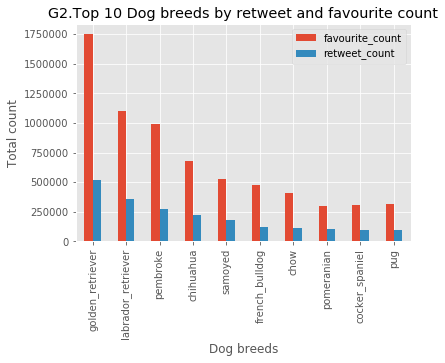

In [5]:
plt.figure(figsize=(10,6))
fav_breeds.groupby('dog_breed')[['favourite_count','retweet_count']].sum().sort_values('retweet_count',ascending=False).head(10).plot(kind='bar');
plt.xlabel('Dog breeds')
plt.ylabel('Total count')
plt.title('G2.Top 10 Dog breeds by retweet and favourite count');
plt.legend();

*Looking at graphs G1 and G2 we see that of the top 5,the top 4 dog breeds continue to trend, however pug seems to be pulled down to 10th place in terms of retweet and favourite count.*

### Spawning dog lingo!

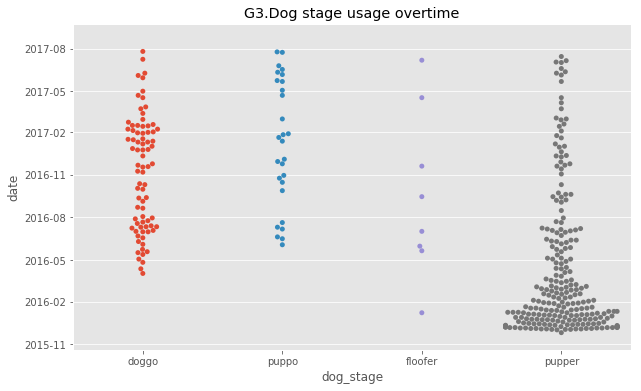

In [6]:
#Dog stage popularity overtime
plt.figure(figsize=(10,6))
sns.swarmplot(x="dog_stage", y="date", data=dog_pred);
plt.title('G3.Dog stage usage overtime');

*Pupper seems to be the earliest dogstage term popularised by WeRateDogs and widely used.The usage gradually has declined with doggo gaining a fair share of popularity.Puppo comes third ,followed by floofer.*

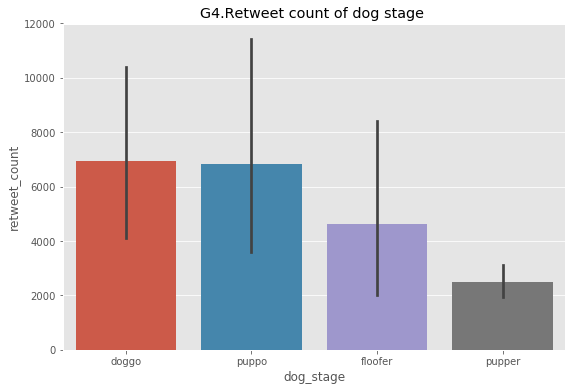

In [7]:
#sns.barplot(x="dog_stage", y="retweet_count", data=fav_breeds,ci=None);
plt.figure(figsize=(9,6))
sns.barplot(x="dog_stage", y="retweet_count", data=fav_breeds);
plt.title('G4.Retweet count of dog stage ');

In [8]:
#Statistic summary
dog_pred.groupby('dog_stage')['date'].describe()

,count,unique,top,freq,first,last
dog_stage,,,,,,
doggo,80,74,2017-01-11 00:00:00,2,2016-04-02 00:00:00,2017-07-26 00:00:00
floofer,8,8,2016-11-20 00:00:00,1,2016-01-08 00:00:00,2017-07-07 00:00:00
pupper,235,160,2015-12-07 00:00:00,5,2015-11-26 00:00:00,2017-07-15 00:00:00
puppo,28,28,2017-01-29 00:00:00,1,2016-06-03 00:00:00,2017-07-25 00:00:00


*Though pupper has the highest count and the earliest.newer terms -doggo and puppo have taken off with more retweets.*

Increasing WeRateDogs appeal is the introduction of dog terms for dog stages -pupper,floofer,doggo and puppo.
Pupper is the earliest dog term introduced and generously used by WeRateDogs in their tweets as we can see from *G3.Dog stage usage overtime*. Soon after whihc we see 'floofer' introduced and 'floofer' did not find firm footing as we see the term is used in fewer tweets.Creative usage of 'floofer' was hard or users didnot send in enough 'floofers'.

Following 'floofer' ,doggo and puppo were introduced which seems to have sliced into the 'pupper' usage.From the *G4.Retweet count of dog stage* graph we see newer terms 'doggo' and 'puppo' fighting neck to neck for popularity.Possibly, the popularity of WeRateDogs has increased with more fans retweeting and WeRateDogs getting more creative with their captions ratings garnering more retweets.'Pupper' though started early and generously used in the early times doesnt seem to be retweeted much.



### Growing appeal of WeRateDogs 

In [2046]:
fav_breeds.set_index('date',inplace=True)

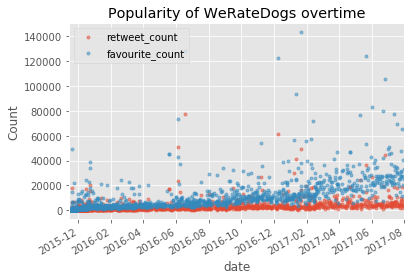

In [2109]:
#Popularity of WeRateDogs overtime
plt.figure(figsize=(10,6));
fav_breeds[['retweet_count','favourite_count']].plot(style = '.',alpha=0.5)
plt.ylabel('Count')
plt.title('Popularity of WeRateDogs overtime');

*WeRateDogs has gained popularity overtime with more retweets*

WeRateDogs has grown popular since its inception days. Increasing retweet count and favourite count from 2015 to 2017 is reflective of their popularity.

<a id='conclusion'></a>
##  Conclusion

The insights gleaned from the cleaned data is based on wrangling a select set of quality and tidiness issues.The above analysis and visualizations gives us an idea of the popularity of dog breeds,how the influence and creative usage of new terms can aid popularity. Their popularity has even led them to start their online dog inspired merchandise store.